## Introduction:
   ### Project Name :
       Investigate a Dataset (No-show appointments)
   ### Dataset Describtion:
       This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
        ● ‘Neighborhood’ indicates the location of the hospital.
        ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
        ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment and i
        show this as 1, and ‘Yes’ if they did not show up i show this as 0.

   ### Suggestions for a dataset questions:
       1. How many appointments are done under scholarship and how many appointments are cancelled under scholarship?
       2. In which areas is it expected that a patient will show up for their scheduled appointment?
       3. If the patient is female or male, what is the probability of attending the appointment according to gender?
       4. Which needs more funding, support, and care, male or female, based on gender and percentage of appointments?

# Questions


#### Research Question 1
    Scholarship is a cost issue for the government and institutions, so we should ask whether it is useful and whether the general public is interested in it; if not, the government can cancel it or we can look for other reasons.
How many appointments are done under scholarship and how many appointments are cancelled under scholarship?

#### Research Question 2 :
In which areas is it expected that a patient will show up for their scheduled appointment?

#### Research Question 3 : 
If the patient is female or male, what is the probability of attending the appointment according to gender?

#### Research Question 4 : 
Which needs more funding, support, and care, male or female, based on gender and percentage of appointments? 

# Wrangling and EDA
    gathering, assessing, cleaning , exploring , and augmenting data


import the packages i need

In [1]:
#For installing and upgrading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --upgrade pandas==1.1.5
!pip install --upgrade matplotlib== 3.3.4

Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)
  Could not find a version that satisfies the requirement matplotlib== (from versions: 0.86, 0.86.1, 0.86.2, 0.91.0, 0.91.1, 1.0.1, 1.1.0, 1.1.1, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.4.0, 1.4.1rc1, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0b1, 2.0.0b2, 2.0.0b3, 2.0.0b4, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc1, 2.2.0, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 3.0.0rc2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.1.0rc1, 3.1.0rc2, 3.1.0, 3.1.1, 3.1.2, 3.1.3, 3.2.0rc1, 3.2.0rc3, 3.2.0, 3.2.1, 3.2.2, 3.3.0rc1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.3.4)
No matching distribution found for matplotlib==


In [2]:
!pip show matplotlib
!pip show pandas

Name: matplotlib
Version: 2.1.0
Summary: Python plotting package
Home-page: http://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: numpy, six, python-dateutil, pytz, cycler, pyparsing
Required-by: wordcloud, seaborn, scikit-image
Name: pandas
Version: 1.1.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: python-dateutil, numpy, pytz
Required-by: vincent, seaborn, pymc3, altair


Loading data and print out a few lines.to inspect any missing or duplicated data.

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing value

Converting ScheduledDay and AppointmentDay from object type to datetime

In [4]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Explore data for duplicating data, But No duplicated data to drop

In [6]:
df.duplicated().sum()

0

Rename column to correct spelling

In [7]:
df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap',"No-show":"Noshow"}, inplace = True)

Dropping unusable columns (cleaning data).

In [8]:
df = df.drop("AppointmentID",axis=1)
df = df.drop("PatientId",axis=1)

In [9]:
df.head(10)

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   
5      F 2016-04-27 08:36:51+00:00 2016-04-29 00:00:00+00:00   76   
6      F 2016-04-27 15:05:12+00:00 2016-04-29 00:00:00+00:00   23   
7      F 2016-04-27 15:39:58+00:00 2016-04-29 00:00:00+00:00   39   
8      F 2016-04-29 08:02:16+00:00 2016-04-29 00:00:00+00:00   21   
9      F 2016-04-27 12:48:25+00:00 2016-04-29 00:00:00+00:00   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   
5          REPÚBLICA            0             1         0           0   
6         GOIABEIRAS            0             0         0           0   
7         GOIABEIRAS            0             0         0           0   
8         ANDORINHAS            0             0         0           0   
9          CONQUISTA            0             0         0           0   

   Handicap  SMS_received Noshow  
0         0             0     No  
1         0             0     No  
2         0             0     No  
3         0             0     No  
4         0             0     No  
5         0             0     No  
6         0             0    Yes  
7         0             0    Yes  
8         0             0     No  
9         0             0     No

Converting value of 'NOshow' from (yes,no) to (0,1) to easily analyse and explore.

In [10]:
df.loc[df["Noshow"] == "No", "Noshow"] = 1
df.loc[df["Noshow"] == "Yes", "Noshow"] = 0
df.head(10)

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   
5      F 2016-04-27 08:36:51+00:00 2016-04-29 00:00:00+00:00   76   
6      F 2016-04-27 15:05:12+00:00 2016-04-29 00:00:00+00:00   23   
7      F 2016-04-27 15:39:58+00:00 2016-04-29 00:00:00+00:00   39   
8      F 2016-04-29 08:02:16+00:00 2016-04-29 00:00:00+00:00   21   
9      F 2016-04-27 12:48:25+00:00 2016-04-29 00:00:00+00:00   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   
5          REPÚBLICA            0             1         0           0   
6         GOIABEIRAS            0             0         0           0   
7         GOIABEIRAS            0             0         0           0   
8         ANDORINHAS            0             0         0           0   
9          CONQUISTA            0             0         0           0   

   Handicap  SMS_received Noshow  
0         0             0      1  
1         0             0      1  
2         0             0      1  
3         0             0      1  
4         0             0      1  
5         0             0      1  
6         0             0      0  
7         0             0      0  
8         0             0      1  
9         0             0      1

The percentage of appointments attended is higher than the percentage of missed appointments. 

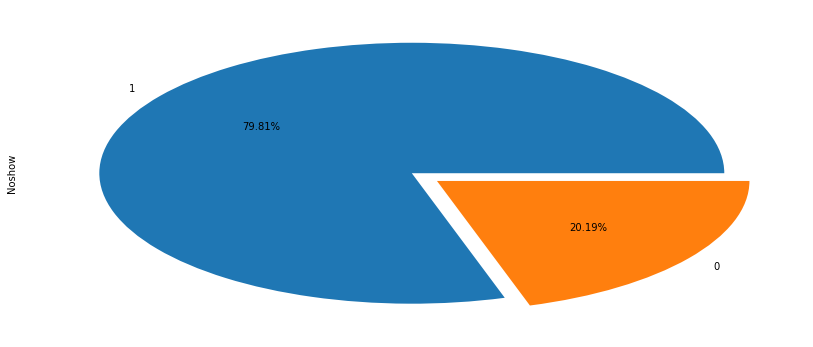

In [11]:
#The percentage of appointments attended is higher than the percentage of missed appointments.
df["Noshow"].value_counts().plot(kind="pie",figsize=(14,6),explode=(0,0.1),autopct=('%1.2f%%'))

In [12]:
#create a function with arguments to prevent repetitive code.
#function to graph the relation between two factors for patient attendance by percentage.
def myPlot(df,x):
    df.groupby([x])['Noshow'].value_counts(normalize=True).mul(100).plot.bar(title='Effect of {} on Patient Attendance'.format(x),xlabel='{} with Noshow'.format(x),figsize=(10, 6),rot=0,color=['red','blue'],ylabel='Percentage of patient attendance')
    #bar.xlabel('{} with Noshow'.format(x))
    #bar.ylabel('Percentage of patient attendance')   

### Research Question 1
Scholarship is a cost issue for the government and institutions, so we should ask whether it is useful and whether the general public is interested in it; if not, the government can cancel it or we can look for other reasons.
### This is the value of how many appointments are done under scholarship and how many appointments are cancelled under scholarship?

In [13]:
SchIsUsefull = len(df.query('Scholarship == 1 and Noshow == 1'))
SchIsUseless = len(df.query('Scholarship == 1 and Noshow == 0'))
SchIsUsefull , SchIsUseless

(8283, 2578)

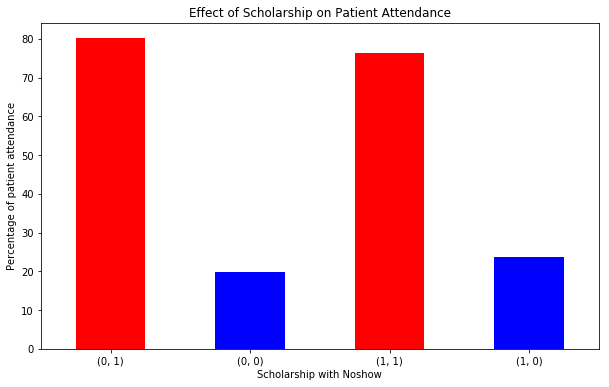

In [14]:
#appointments are done under scholarship and appointments are cancelled under scholarship in percentage.
myPlot(df,'Scholarship')

Scholarship is a valuable programme because it funds 8283 appointments, which is a large number for continuing Scholarship, which will necessitate more effort and funding and not cancelling.

### Research Question 2 :In which areas is it expected that a patient will show up for their scheduled appointment?

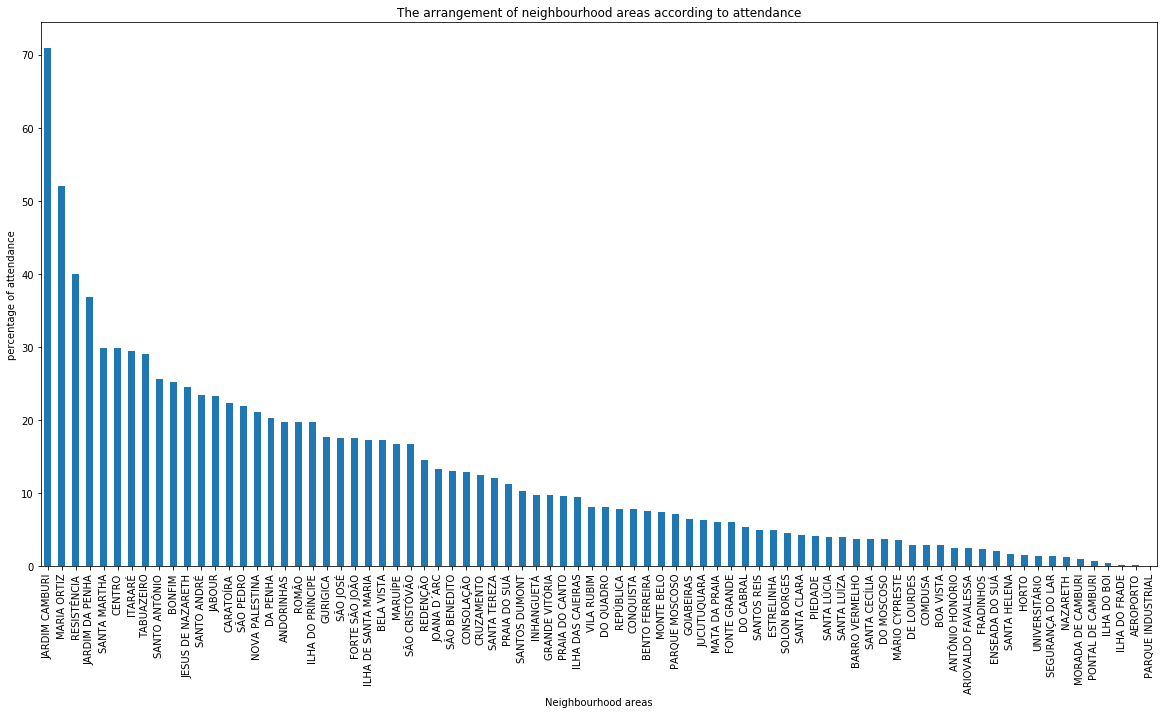

In [15]:
#Display The arrangement of neighbourhood areas according to attendance as percentage value.
df.query("Noshow == 1")["Neighbourhood"].value_counts(normalize=True).mul(1000).plot.bar(title="The arrangement of neighbourhood areas according to attendance",xlabel='Neighbourhood areas',ylabel='percentage of attendance',figsize= (20,10))


We now know in which areas a patient is expected to show up for their scheduled appointment.
For top areas:
1. JARDIM CAMBURI          
2. MARIA ORTIZ             
3. RESISTÊNCIA             
4. JARDIM DA PENHA        
5. SANTA MARTHA            
and The arrangement of rest areas is displayed in the graph above.

In [16]:
df.query("Noshow == 1")["Neighbourhood"].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

### Research Question 3 : If the patient is female or male, what is the probability of attending the appointment according to gender?

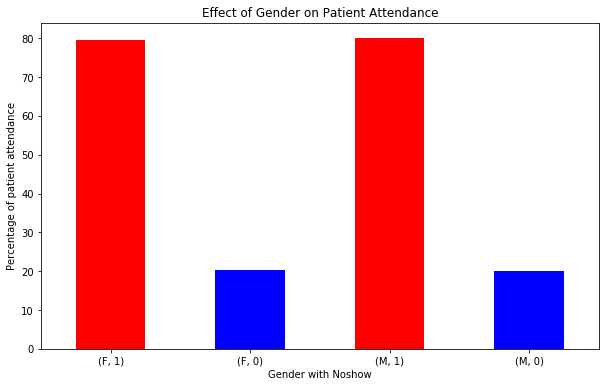

In [17]:
#the relation between Gender and Noshow for patient attendance by percentage.
myPlot(df,'Gender')

I discovered that the probability of attendance for a female appointment is 79.68%, and the probability of attendance for a male appointment is 80.03%.

I discovered that there is a greater need for female medical specialties and funding, support, and care than for male medical specialties because females account for 64.89% of all visits compared to 35.10% for males.

In [18]:
#percentage of female appointment attendance for female appointments only
(len(df.query("Noshow == 1 and Gender == 'F'"))/len(df.query("Gender == 'F'")))*100

79.68541202672606

In [19]:
#percentage of male appointment attendance for male appointments only
(len(df.query("Noshow == 1 and Gender == 'M'"))/len(df.query("Gender == 'M'")))*100

80.03205211052808

### Research Question 4 : Which needs more funding, support, and care, male or female, based on gender and percentage of appointments? 

In [20]:
#percentage of female appointment attendance for all appointments
(len(df.query("Noshow == 1 and Gender == 'F'"))/len(df.query("Noshow == 1")))*100

64.89887538545257

In [21]:
#percentage of male appointment attendance for all appointments
(len(df.query("Noshow == 1 and Gender == 'M'"))/len(df.query("Noshow == 1")))*100

35.10112461454744

<a id='conclusions'></a>
# Conclusions

#### For Question 1:
Scholarship is a valuable programme because it funds 8283 appointments, which is a large number for continuing Scholarship, which will necessitate more effort and funding and not cancelling.

#### For Question 2:
We now know in which areas a patient is expected to show up for their scheduled appointment.
For top areas:
1. JARDIM CAMBURI          6252
2. MARIA ORTIZ             4586
3. RESISTÊNCIA             3525
4. JARDIM DA PENHA         3246
5. SANTA MARTHA            2635
6. CENTRO                  2631
7. ITARARÉ                 2591
8. TABUAZEIRO              2559
9. SANTO ANTÔNIO           2262
10. BONFIM                 2223

and The arrangement of rest areas is displayed in the graph above.

#### For Question 3: 
I discovered that the probability of attendance for a female appointment is 79.68%, and the probability of attendance for a male appointment is 80.03%.

#### For Question 4:
I discovered that there is a greater need for female medical specialties and funding, support, and care than for male medical specialties because females account for 64.89% of all visits compared to 35.10% for males.

## Limitations:
    The dataset contains insufficient data to investigate what is the direct factor influencing the patient's decision to attend or not attend the appointment. Only general information is available. 

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0